In [1]:
from morph import *
import numpy as np
from skimage import io
from skimage.morphology import erosion, dilation
from mpl_toolkits.axes_grid1 import AxesGrid
#import matplotlib as mpl

import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [18*20, 12*20]

%matplotlib inline

### Testando filtros diferentes 

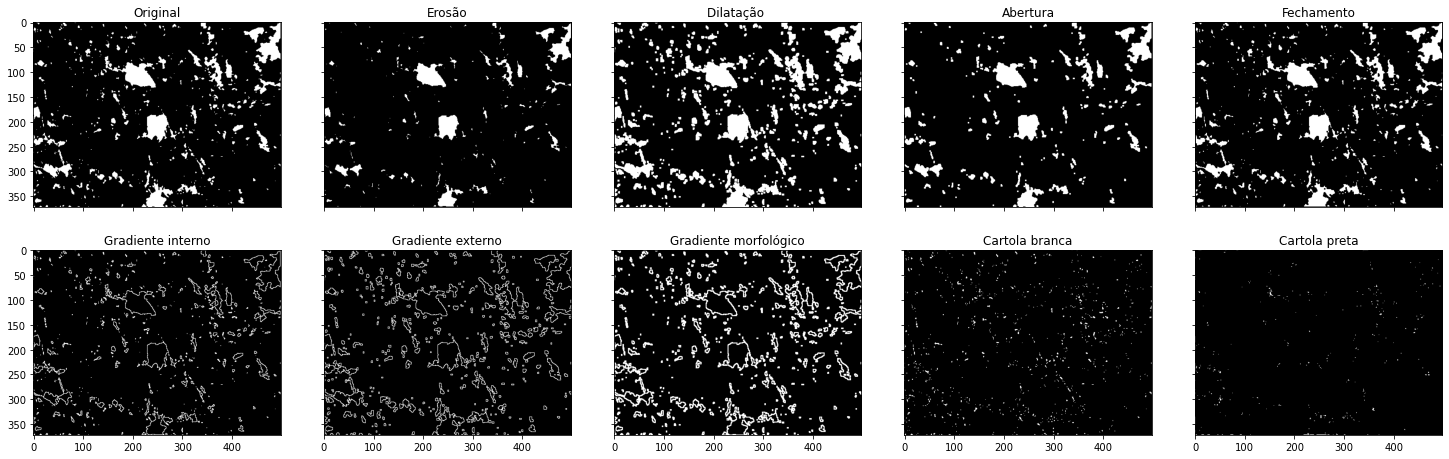

In [2]:
img = plt.imread("images/mask.png")[:,:,0]
fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(150)

fig.subplots_adjust(left=0.05, right=0.95)
grid = AxesGrid(fig, 141, nrows_ncols=(2, 5), axes_pad=0.6)

filters = ['original', 'er','di', 'op', 'cl', 'ig', 'eg', 'mg', 'wth', 'bth']
titles = ['Original', 'Erosão', 'Dilatação ', 'Abertura', 'Fechamento', 'Gradiente interno', 'Gradiente externo', 'Gradiente morfológico', 'Cartola branca', 'Cartola preta']

grid[0].set_title(titles[0])
grid[0].imshow(apply_threshold(img), cmap=plt.cm.binary_r)
for i, f in zip(range(1, len(filters)), filters[1:]):
    grid[i].set_title(titles[i])
    result = morph_filter(f, img)
    grid[i].imshow(result, cmap=plt.cm.binary_r)
plt.savefig("images/filtros.png", bbox_inches='tight')

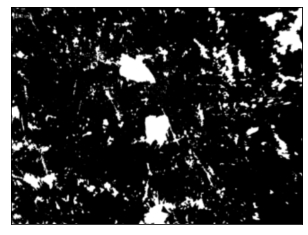

In [3]:
img = plt.imread("images/mask.png")[:,:,0]
er = morph_filter("er", img)
show(img)

### Aplicar um filtro várias vezes

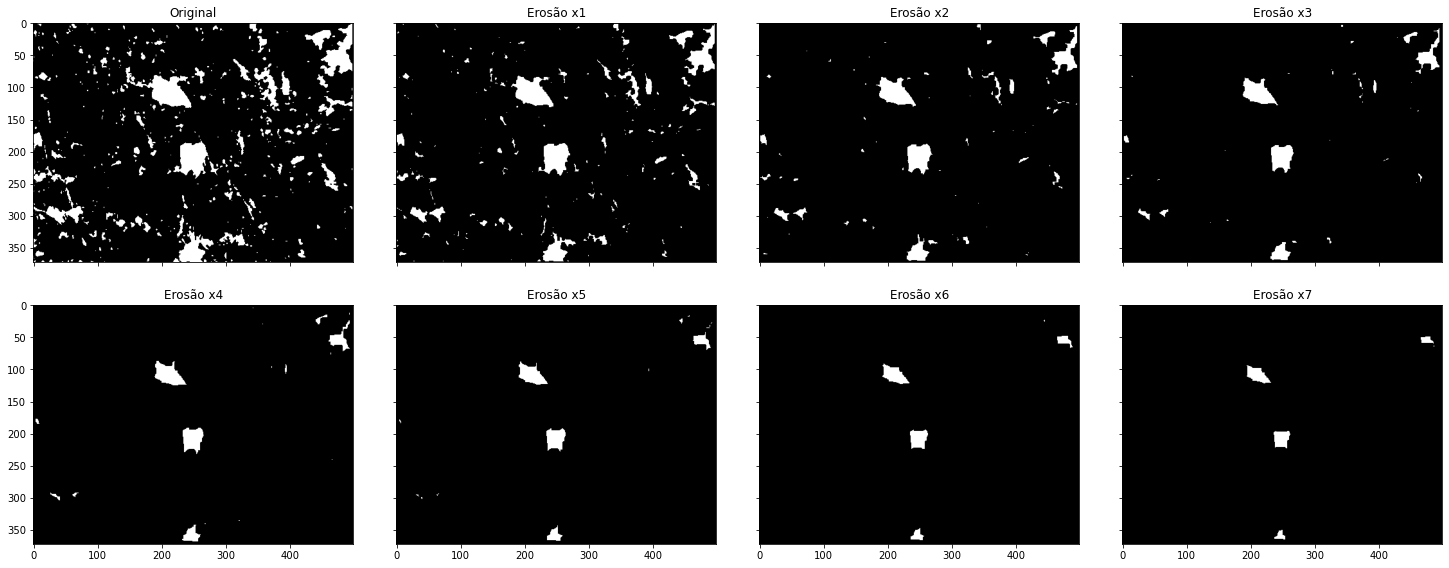

In [4]:
ico = plt.imread("images/mask.png")[:,:,0]

fig2 = plt.figure()
fig2.set_figwidth(100)
fig2.set_figheight(150)

fig2.subplots_adjust(left=0.05, right=0.95)
grid2 = AxesGrid(fig2, 141, nrows_ncols=(2, 4), axes_pad=0.6)

titles2 = ['Original', 'Erosão x1', 'Erosão x2', 'Erosão x3', 'Erosão x4', 'Erosão x5', 'Erosão x6', 'Erosão x7']


grid2[0].set_title(titles2[0])
grid2[0].imshow(apply_threshold(ico), cmap=plt.cm.binary_r)
for i in range(1, len(titles2)):
    grid2[i].set_title(titles2[i])
    result = morph_filter('er', ico, n_iterations=i)
    grid2[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filtros_varias_vezes.png", bbox_inches='tight')

### Aplicando diferentes tipos de elementos estruturantes

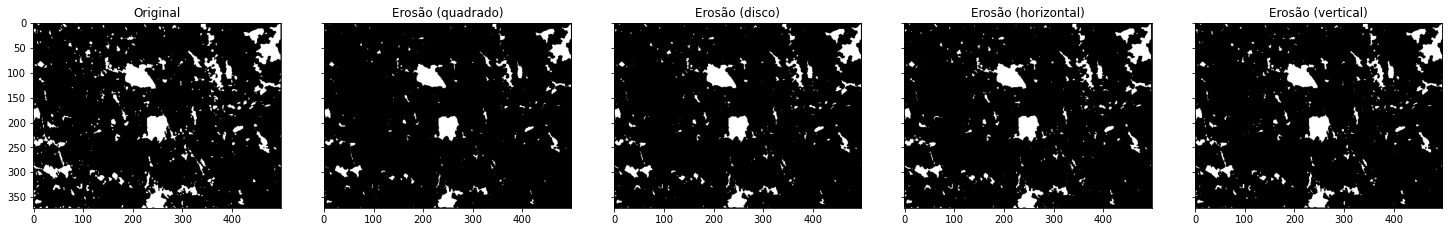

In [6]:
img = plt.imread("images/mask.png")[:,:,0]
se1 = np.ones((3,3), dtype=np.uint8)

se2 = np.array([[0, 1, 0], 
               [1, 1, 1], 
               [0, 1, 0]], dtype=np.uint8)

se3 = np.array([[0, 0, 0], 
               [1, 1, 1], 
               [0, 0, 0]], dtype=np.uint8)

se4 = np.array([[0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0]], dtype=np.uint8)

fig3 = plt.figure()
fig3.set_figwidth(100)
fig3.set_figheight(150)

fig3.subplots_adjust(left=0.05, right=0.95)
grid3 = AxesGrid(fig3, 141, nrows_ncols=(1, 5), axes_pad=0.6)

titles3 = ['Original','Erosão (quadrado)', 'Erosão (disco)', 'Erosão (horizontal)', 'Erosão (vertical)']
selem_names = ['quadrado', 'disco', 'horizontal', 'vertical']

selems = [se1, se1, se2, se3, se4]

grid3[0].set_title(titles3[0])
grid3[0].imshow(apply_threshold(img), cmap=plt.cm.binary_r)
for i in range(1, len(titles3)):
    grid3[i].set_title(titles3[i])
    result = morph_filter('er', img, sel=selems[i])
    grid3[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filters_multiplos.png", bbox_inches='tight')

###  Aplicação de diferentes tamanhos de elementos estruturantes

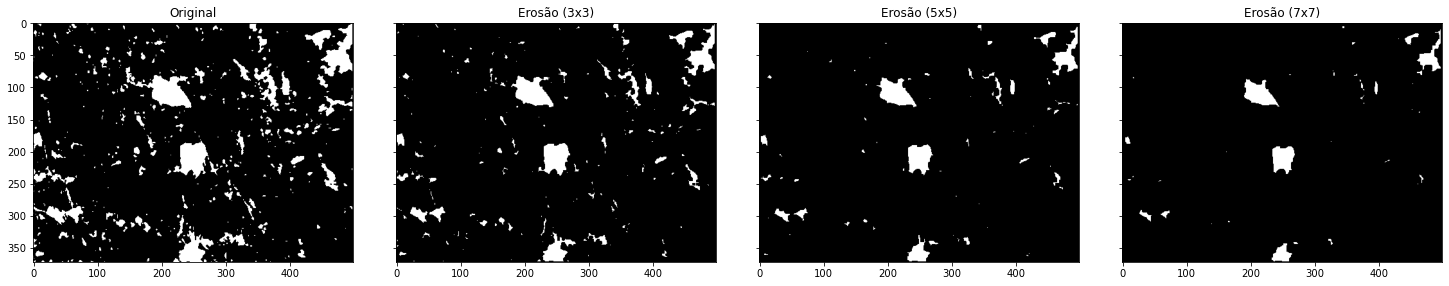

In [7]:
ico = plt.imread("images/mask.png")[:,:,0]
se1 = np.ones((3,3), dtype=np.uint8)
se2 = np.ones((5,5), dtype=np.uint8)
se3 = np.ones((7,7), dtype=np.uint8)

fig4 = plt.figure()
fig4.set_figwidth(100)
fig4.set_figheight(150)

fig4.subplots_adjust(left=0.05, right=0.95)
grid4 = AxesGrid(fig4, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles4 = ['Original', 'Erosão (3x3)', 'Erosão (5x5)', 'Erosão (7x7)']
sizes = ['3x3', '5x5', '7x7']

selems = [se1, se1, se2, se3]

grid4[0].set_title(titles4[0])
grid4[0].imshow(apply_threshold(ico), cmap=plt.cm.binary_r)
for i in range(1, len(titles4)):
    grid4[i].set_title(titles4[i])
    result = morph_filter('er', ico, sel=selems[i])
    grid4[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filtros_tamanhos_estruturados.png", bbox_inches='tight')

### Como os elementos estruturantes se parecem

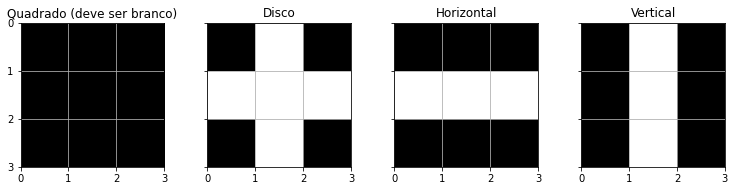

In [8]:
ee1 = np.ones((3,3), dtype=np.uint8)

ee2 = np.array([[0, 1, 0], 
                [1, 1, 1], 
                [0, 1, 0]], dtype=np.uint8)

ee3 = np.array([[0, 0, 0], 
                [1, 1, 1], 
                [0, 0, 0]], dtype=np.uint8)

ee4 = np.array([[0, 1, 0], 
                [0, 1, 0], 
                [0, 1, 0]], dtype=np.uint8)


fig5 = plt.figure()
fig5.set_figwidth(50)
fig5.set_figheight(120)

fig5.subplots_adjust(left=0.05, right=0.95)
grid5 = AxesGrid(fig5, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles5 = ['Quadrado (deve ser branco)', 'Disco', 'Horizontal', 'Vertical']

ees = [ee1, ee2, ee3, ee4]

for i in range(len(titles5)):
    grid5[i].set_title(titles5[i])
    grid5[i].imshow(ees[i], cmap=plt.cm.binary_r)
    grid5[i].grid(True)
    axes = grid5[i]
    axes.set_xticks(np.arange(-.5, 3, 1))
    axes.set_yticks(np.arange(-.5, 3, 1))
    axes.set_xticklabels(np.arange(0, 3 + 1, 1))
    axes.set_yticklabels(np.arange(0, 3 + 1, 1))

plt.savefig("images/tipos_transformação.png", bbox_inches='tight')

### Testando filtros de modo de escala de cinza

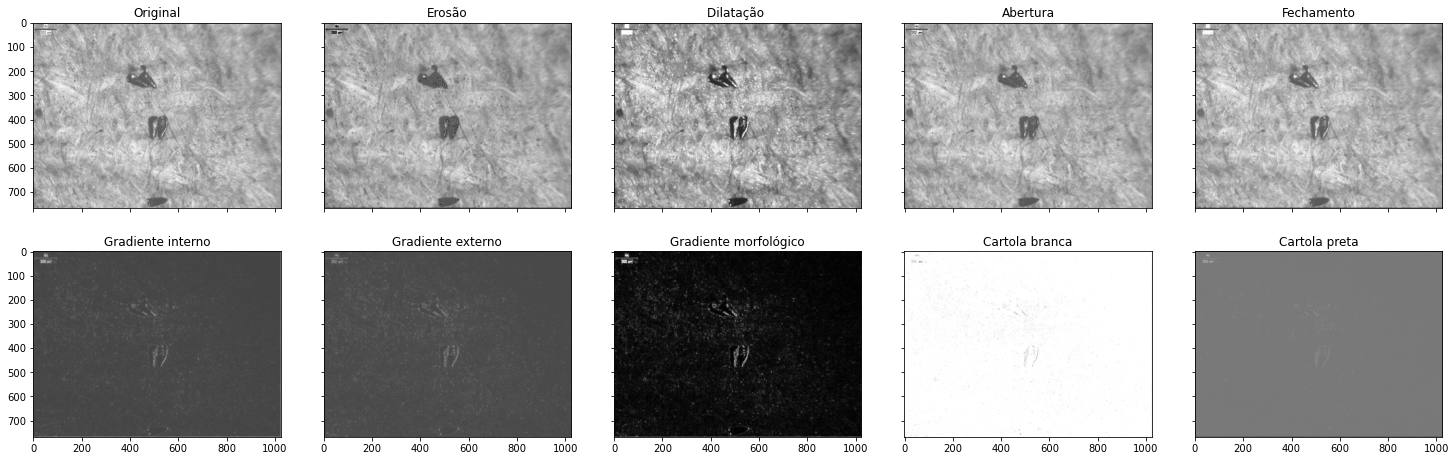

In [28]:
img = plt.imread("images/original.png")[:,:,0]


fig6 = plt.figure()
fig6.set_figwidth(100)
fig6.set_figheight(150)

fig6.subplots_adjust(left=0.05, right=0.95)
grid6 = AxesGrid(fig6, 141, nrows_ncols=(2, 5), axes_pad=0.6)

filters6 = ['original', 'er','di', 'op', 'cl', 'ig', 'eg', 'mg', 'wth', 'bth']
titles6 = ['Original', 'Erosão', 'Dilatação ', 'Abertura', 'Fechamento', 'Gradiente interno', 'Gradiente externo', 'Gradiente morfológico', 'Cartola branca', 'Cartola preta']

grid6[0].set_title(titles6[0])
grid6[0].imshow(img, cmap=plt.cm.binary_r)
for i, f in zip(range(1, len(filters6)), filters6[1:]):
    grid6[i].set_title(titles6[i])
    result = morph_filter(f, img, as_gray=True)
    result = (result*255).astype(np.int64)
    grid6[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filtros_cinza.png", bbox_inches='tight')

### Testando reconstrução morfológica

In [19]:
chars = plt.imread("images/original.png")[:,:,0]
chars = chars / chars.max()
ee = np.array([[0,1,0],
              [1,1,1],
              [0,1,0]], dtype=np.int64)
chars = 1 - chars

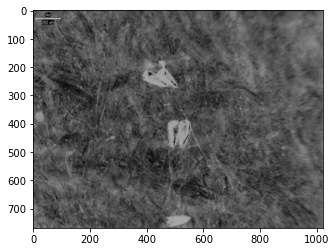

In [20]:
plt.imshow(chars, cmap=plt.cm.binary_r)

In [21]:
mark = morph_filter('di', chars, ee, 4)
mark = mark.astype(np.uint8)
io.imsave("test_images/morph_recon_mark.png", mark*255)

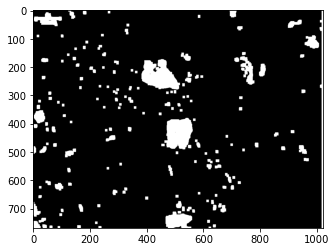

In [22]:
plt.imshow(mark, cmap=plt.cm.binary_r)
plt.savefig("images/morphological-mark.png", bbox_inches='tight')

In [23]:
reconstruction = morphological_reconstruction(mark, chars, False, sel=ee)

In [24]:
reconstruction

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [25]:
reconstruction = reconstruction.astype(np.uint8)

In [26]:
io.imsave("test_images/morph_recon.png", reconstruction*255)

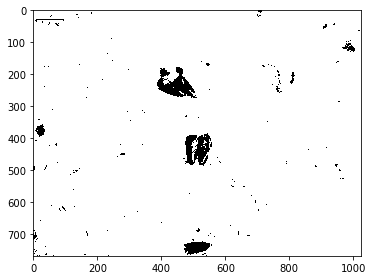

In [27]:
io.imshow(reconstruction*255)
plt.savefig("images/morphological-reconstruction.png", bbox_inches='tight')